In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

import plotly.express as px

from sklearn.preprocessing import StandardScaler


# 數據預處理

In [2]:
df = pd.read_csv(r"E:\Datasets\Video Game Sales\vgsales.csv")

In [3]:
# 1.查看數據
print(df.shape)
df.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# 2.觀察數據型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


- 1.觀察到Year與Publisher的數據有缺失，數量不大，不引響分析採用刪除法清除空值。
- 2.Year是發行年分型態應為datatime，但原始資料只有提供年分，所以不進行轉換。

In [5]:
# 3.空值觀察與處理
df = df.dropna()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## 數據定義
- Rank:銷售總金額排名
- Name:遊戲名稱
- Platform:發售平台
- Year:發售年分
- Genre:遊戲類型
- Publisher:遊戲發行商
- NA_Sales: 北美地區的銷售額
- EU_Sales: 歐洲地區的銷售額
- JP_Sales: 日本地區的銷售額
- Other_Sales: 其他地區的銷售額
- Global_Sales: 全球總銷售額
###### 銷售額單位是百萬美元。
### 數據共有16598行，11個特徵。

In [6]:
# 4.重複值觀察
df.duplicated().sum()

0

In [7]:
# 5.使用描述性統計觀察數值資料
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df.describe(include = ['object','bool'])

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


# 遊戲主機世代劃分

## 前提:
由於時間跨度大，且遊戲主機不斷推陳出新，而遊戲開發技術的突破與主機性能有著密切關聯，且各時代的購買力及遊戲機的普及程度並不相同。因此，我們將基於不同的遊戲機世代進行劃分，這是根據硬體技術和遊戲發展的演進而制定的。
​
## 第一世代 (1972-1980)
- **代表主機：** Magnavox Odyssey、Home Pong。
- **特點：** 單純的遊戲，基本上是運動類型。
​
## 第二世代 (1976-1992)
- **代表主機：** Atari 2600、Intellivision、ColecoVision。
- **特點：** 遊戲變得更具多樣性，遊戲卡匣成為主要儲存媒體。
​
## 第三世代 (1983-2003)
- **代表主機：** Nintendo Entertainment System (NES)、Sega Master System。
- **特點：** 8位元遊戲，優化遊戲品質和遊戲操控。
​
## 第四世代 (1987-2004)
- **代表主機：** Super Nintendo Entertainment System (SNES)、Sega Genesis。
- **特點：** 16位元遊戲，更進階的圖形和聲音。
​
## 第五世代 (1993-2006)
- **代表主機：** Sony PlayStation、Nintendo 64、Sega Saturn。
- **特點：** 3D遊戲開始流行，CD-ROM成為主要儲存媒體。
​
## 第六世代 (1998-2013)
- **代表主機：** Sony PlayStation 2、Microsoft Xbox、Nintendo GameCube。
- **特點：** 更先進的3D圖形和聲音，儲存媒體轉向DVD。
​
## 第七世代 (2005-2017)
- **代表主機：** Xbox 360、PlayStation 3、Wii。
- **特點：** 高畫質遊戲，網路遊戲盛行。
​
## 第八世代 (2012-至今)
- **代表主機：** PlayStation 4、Xbox One、Nintendo Switch。
- **特點：** 高解析度、虛擬現實(VR)技術，遊戲串流服務。
​

<Axes: xlabel='Year'>

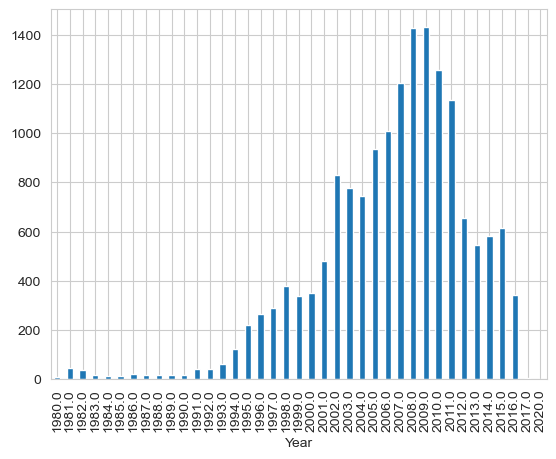

In [9]:
#清理髒數據
df.loc[(df['Platform'] == 'DS') & (df['Year'] == 1985.0), 'Year'] = 2007

#觀察年份屬於甚麼世代
df_year = df.groupby(by = 'Year').size()
df_year.plot.bar()  

- 從各年代的遊戲數據觀察，1980年代時遊戲剛開始發展，數據量不多，從1994年開始遊戲數產業開始急遽發展，2006年至2011年左右遊戲機的性能及遊戲開發的技術可能有所突破開始倍數增長。
- 2012年卻呈現負成長，可能的原因有以下:
    
    - 1.技術轉變和平台變化： 2012年以後，手機和平板電腦等移動裝置開始崛起，這可能導致一些開發者轉向移動遊戲市場，而不是傳統的遊戲主機。這種技術轉變可能導致主機遊戲的數量減少。
    - 2. 主機世代週期： 主機有限的世代週期可能會影響遊戲的發布情況。當新的主機發布時，開發者可能會專注於該平台，而不是之前的主機，而2012年時正好是第八代主機開始的時間，而我們數據涵蓋範圍只到了第八代主機的初期，多數第八代主機遊戲及遊戲還未面世，造成了遊戲數量減少的假象。
- 為了驗證假設我平台佔有率及世代分群長條圖來進行驗證。

In [10]:
#對未完成的數據進行排除
df = df[~df['Year'].isin([2017, 2018, 2020])]
df.Year.sort_values().tail()

16019    2016.0
1224     2016.0
10231    2016.0
16051    2016.0
8190     2016.0
Name: Year, dtype: float64

- 2017年-2020年幾乎沒有遊戲數據，表示數據還為完成，樣本數將進行清理。

Text(0, 0.5, 'Number of Games')

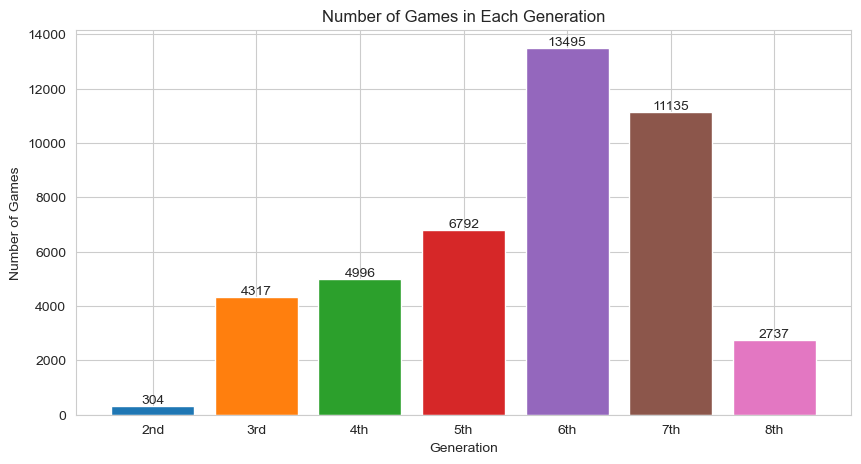

In [11]:
#進行世代分群(以年份分群)
def generation_filter(df, start_year, end_year):
    df_filter = df[df['Year'].between(start_year, end_year)].sort_values('Year', ascending=False)
    return df_filter

df_2nd = generation_filter(df, 1976, 1992)
df_3rd = generation_filter(df, 1983, 2003)
df_4th = generation_filter(df, 1987, 2004)
df_5th = generation_filter(df, 1993, 2006)
df_6th = generation_filter(df, 1998, 2013)
df_7th = generation_filter(df, 2005, 2017)
df_8th = generation_filter(df, 2012, 2023)

#繪製個世代的遊戲數量長條圖
generations_data = [df_2nd, df_3rd, df_4th, df_5th, df_6th, df_7th,df_8th]
generation_names = ['2nd', '3rd', '4th', '5th', '6th', '7th' , '8th']

#建立畫布
plt.figure(figsize = (10,5))
for generations,name in zip(generations_data,generation_names):
    plt.bar(name,len(generations))
    plt.text(name, len(generations) + 0.1, str(len(generations)), ha='center', va='bottom')
plt.title('Number of Games in Each Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Games')

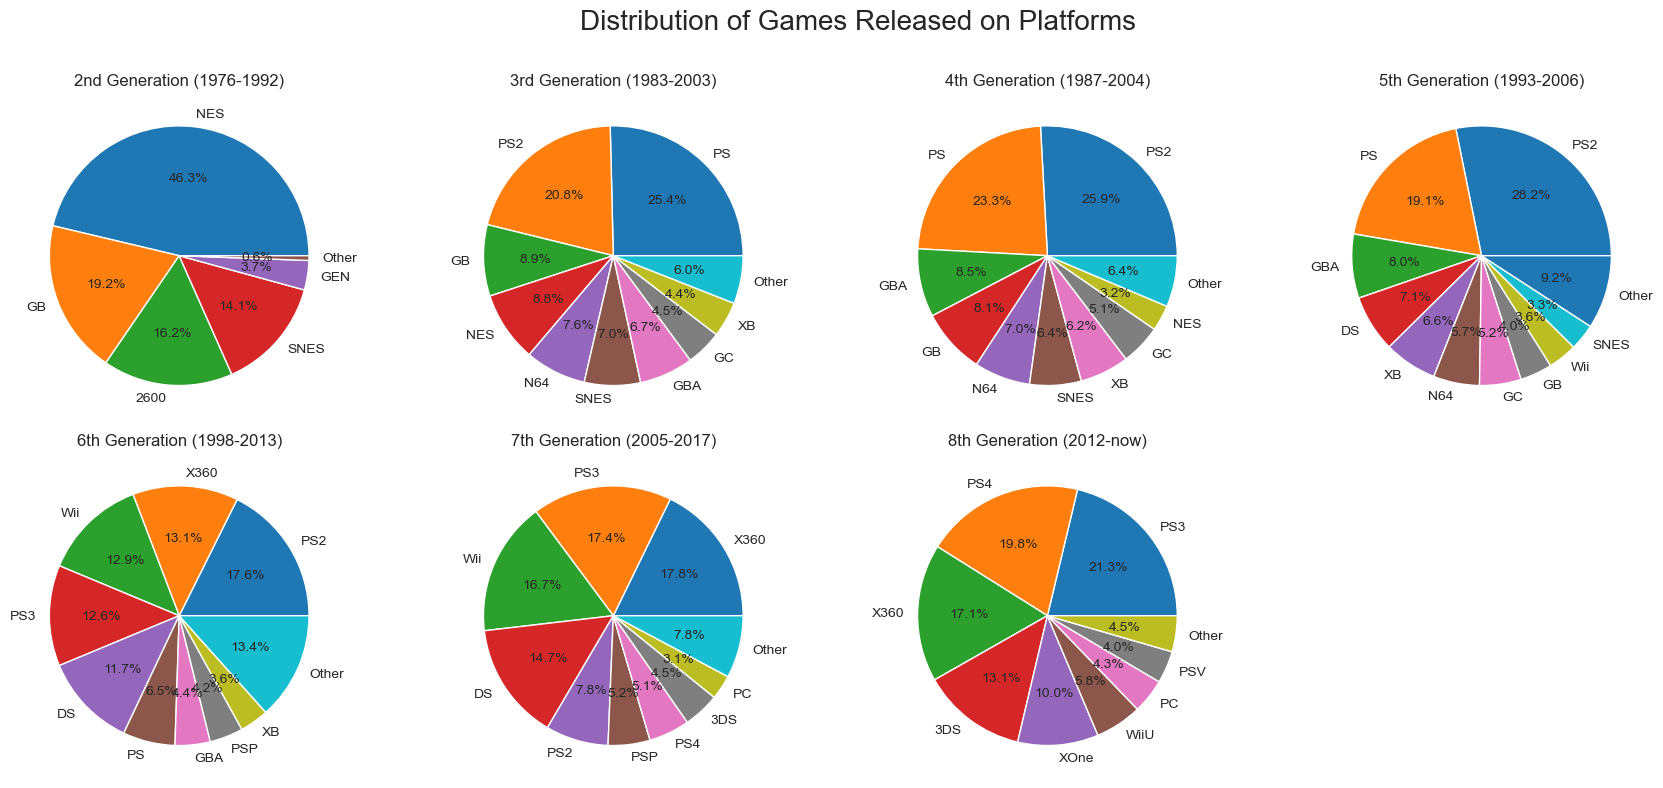

In [12]:
# 函數：計算市場佔有率並繪製圓餅圖
def platform_analysis(df, title='', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 12))

    # 計算每個平台銷售總額
    platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
    # 計算該世代平台銷售總額
    total_global_sales = df['Global_Sales'].sum()

    # 計算市場佔有率
    market_share = (platform_sales / total_global_sales) * 100

    # 將市場佔有率排序
    sorted_market_share = market_share.sort_values(ascending=False)

    # 確定 3% 閾值
    threshold = 3.0

    # 將最小的 5% 總和成一個 "其他" 部分
    small_share = sorted_market_share[sorted_market_share < threshold]
    other_share = pd.Series([small_share.sum()], index=['Other'])
    new_market_share = pd.concat([sorted_market_share[sorted_market_share >= threshold], other_share])

    # 繪製圓餅圖
    new_market_share.plot.pie(autopct='%1.1f%%', ax=ax)
    ax.set_title(title)
    ax.set_ylabel('')

# 創建一個 2x4 的子圖配置
fig, axes = plt.subplots(2, 4, figsize=(18, 8), sharex=True, sharey=True)
fig.suptitle('Distribution of Games Released on Platforms', fontsize=20)

# 使用 np.unravel_index 將一維索引轉換為二維索引
platform_analysis(df_2nd, title='2nd Generation (1976-1992)', ax=axes[0, 0])
platform_analysis(df_3rd, title='3rd Generation (1983-2003)', ax=axes[0, 1])
platform_analysis(df_4th, title='4th Generation (1987-2004)', ax=axes[0, 2])
platform_analysis(df_5th, title='5th Generation (1993-2006)', ax=axes[0, 3])
platform_analysis(df_6th, title='6th Generation (1998-2013)', ax=axes[1, 0])
platform_analysis(df_7th, title='7th Generation (2005-2017)', ax=axes[1, 1])
platform_analysis(df_8th, title='8th Generation (2012-now)', ax=axes[1, 2])

# 調整子圖的間距
plt.tight_layout(rect=[0, 0, 0.97, 0.97])
axes[-1, -1].set_visible(False)

- 長條圖為經過世代分群後各世代主機平台上的遊戲數量，整體趨勢與年分遊戲數據相同，但第七世代時遊戲數量並沒有明顯減少，而第八世代時卻比第三世代更少，證明了上述的主機世代週期的假設。
- 圓餅圖為各世代主機上的市場占有率占比，可以看到第七世代的PS3及X360在第八世代仍有相當高的占比，這可能表示第八世代的主機還未完全取代前一代主機，所以相應的遊戲數量較少。
- 基於本資料PC平台的佔有率在第八世代時仍然不高所以**技術轉變和平台變化**本資料上並不成立。

## 各年代銷售總額分析

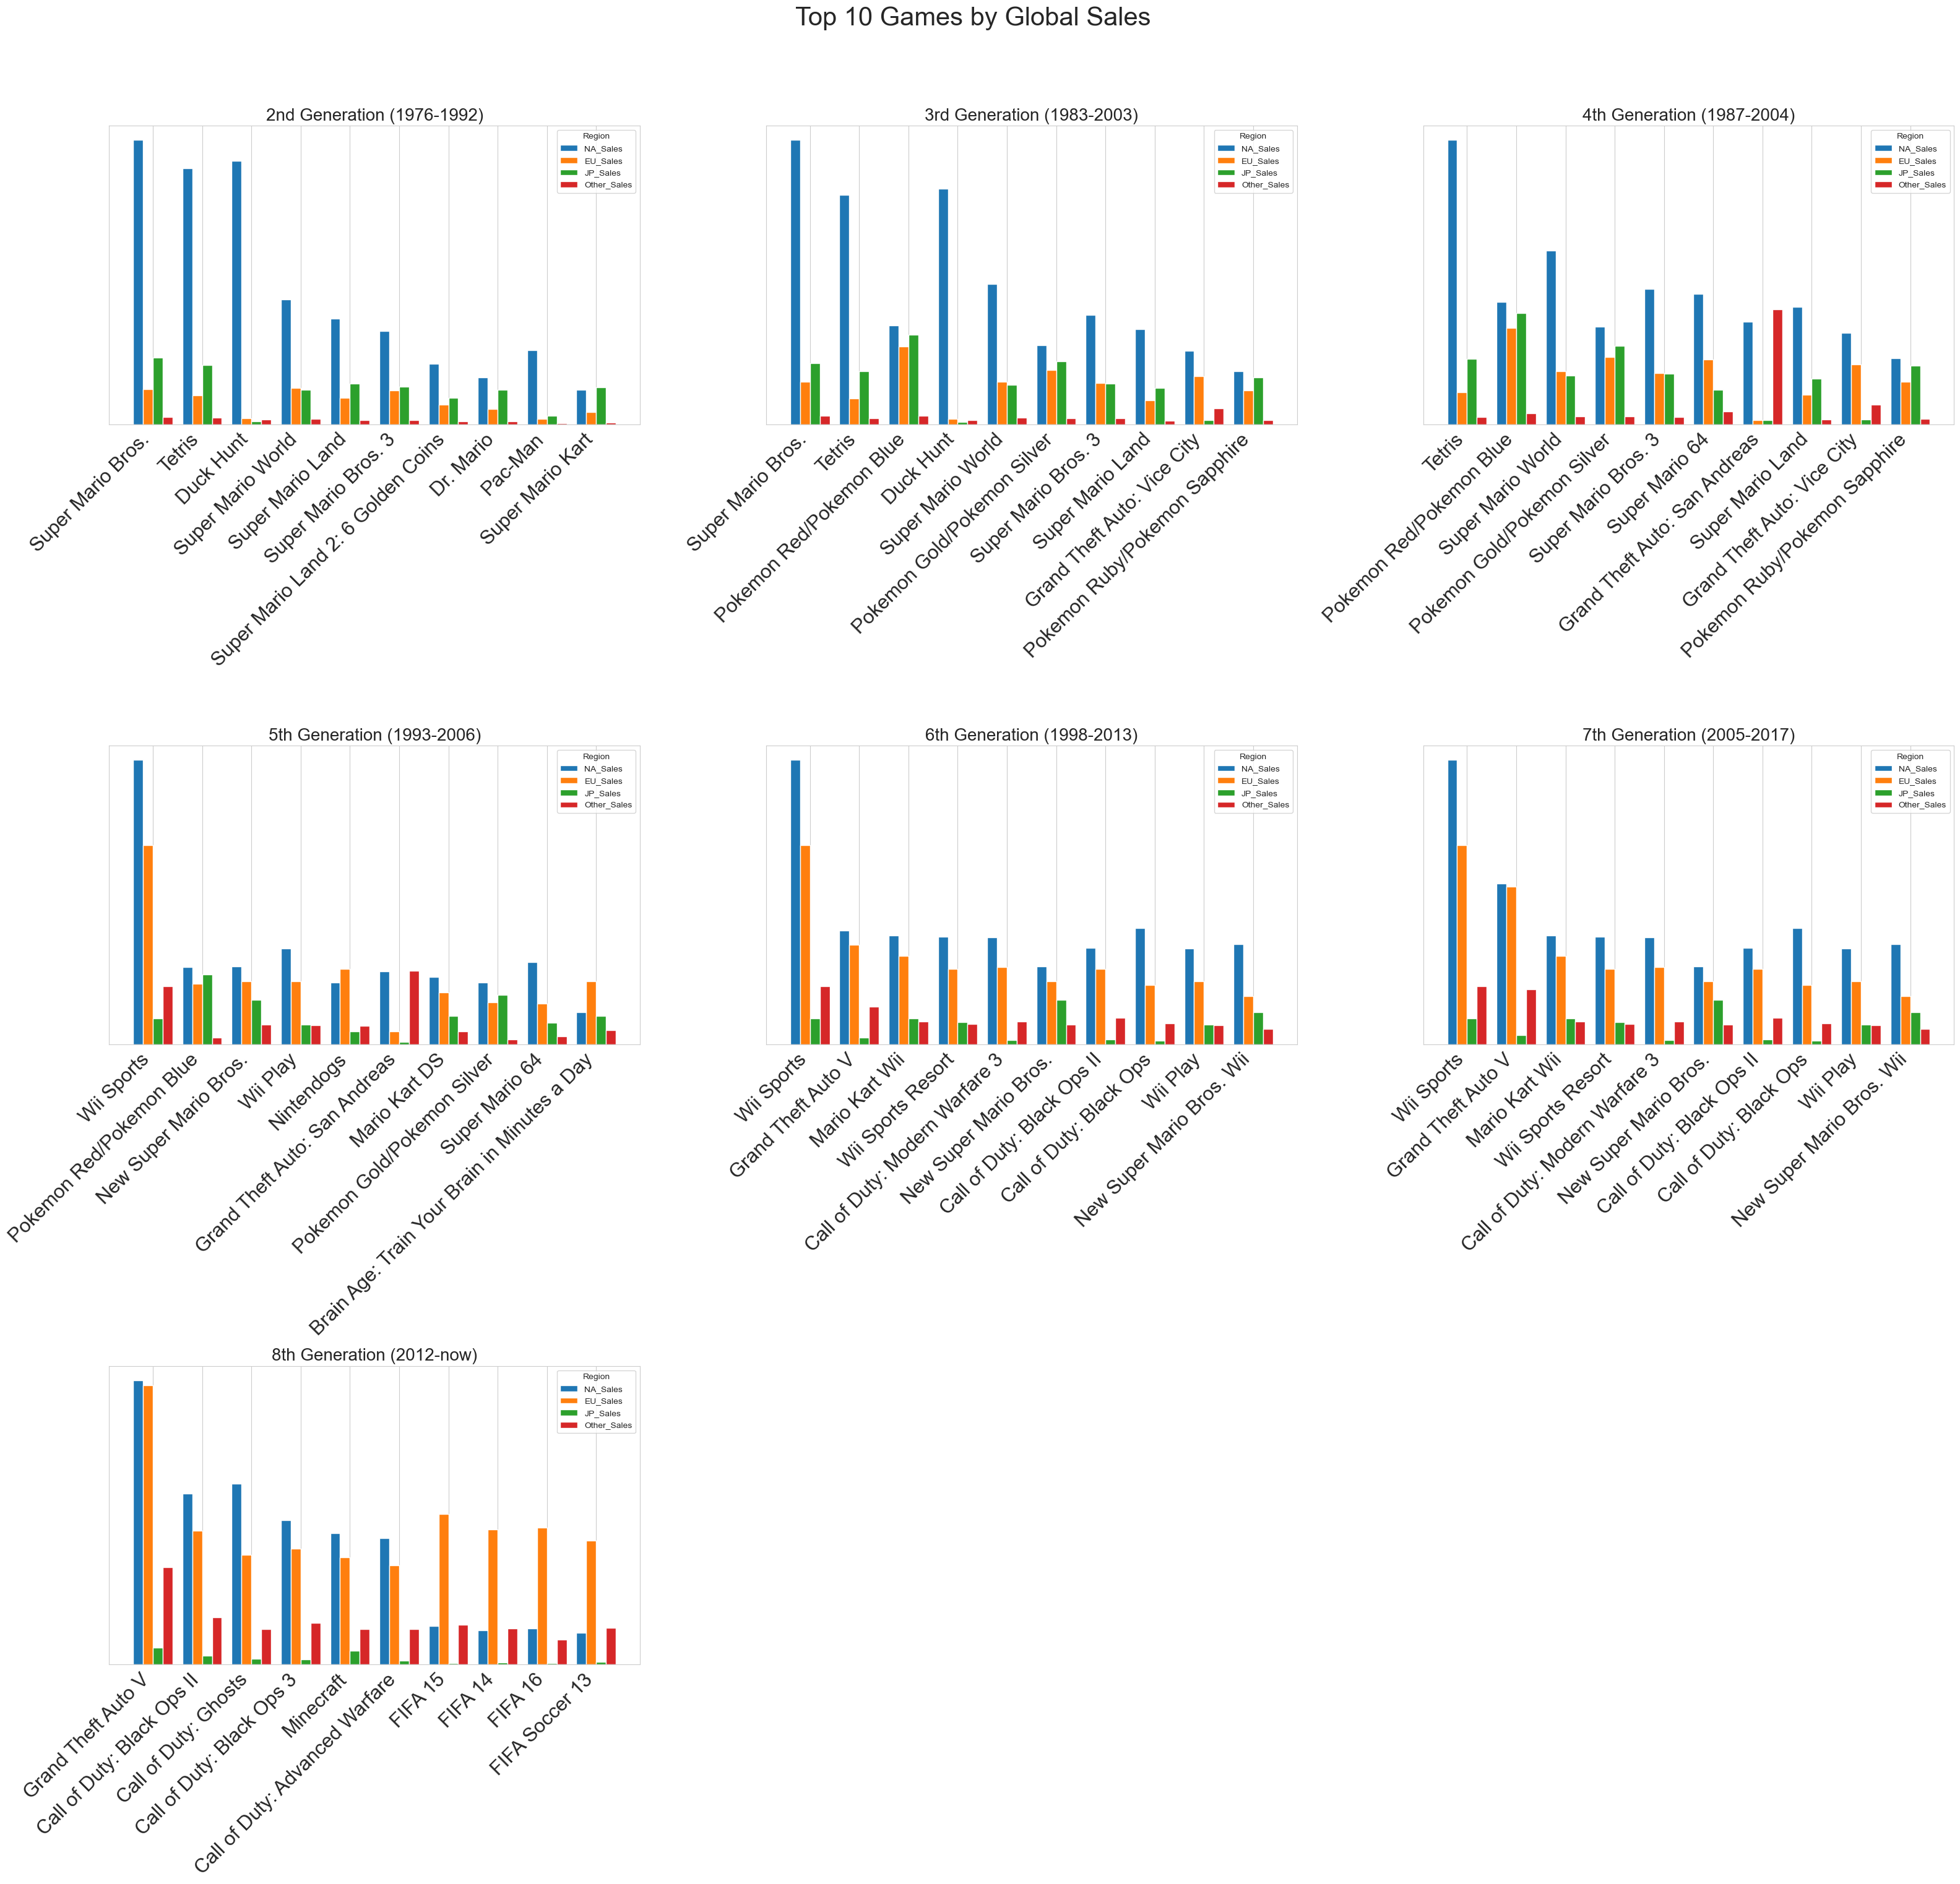

In [13]:
def region_Sales_analysis(df, title='', ax=None):

    # 依據遊戲名稱分組，並對各地區銷售額進行總和計算
    df_games = df.groupby(by='Name').agg({
        'NA_Sales': 'sum',
        'EU_Sales': 'sum',
        'JP_Sales': 'sum',
        'Other_Sales': 'sum',
        'Global_Sales': 'sum'
    }).reset_index()

    # 選取前 10 名遊戲
    df_top_games = df_games.sort_values('Global_Sales', ascending=False).head(10)

    # 繪製條形圖
    bar_width = 0.2
    index = np.arange(len(df_top_games['Name']))

    for i, region in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
        ax.bar(index + i * bar_width, df_top_games[region], bar_width, label=region)

    # 設定標題、標籤等
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('Sales by Region for Top 10 Games')
    ax.set_xticks(index + bar_width * 1.5)
    ax.set_xticklabels(df_top_games['Name'], rotation=45, ha='right')
    ax.legend(title='Region')

    # 調整 X 軸標籤的字體大小
    ax.tick_params(axis='x', labelsize=23)

    ax.set_xticks(index + bar_width * 1.5)
    ax.set_xticklabels(df_top_games['Name'], rotation=45, ha='right')
    ax.legend(title='Region')

    # 移除 y 軸的刻度
    ax.yaxis.set_major_locator(plt.NullLocator())

    # 調整子圖標題
    ax.set_title(title,fontdict={'fontsize': 20})

# 創建一個 2x3 的子圖配置
fig, axes = plt.subplots(3, 3, figsize=(32, 32))
fig.suptitle('Top 10 Games by Global Sales', fontsize=30)

# 在每個子圖上調用函數
region_Sales_analysis(df_2nd, title='2nd Generation (1976-1992)', ax=axes[0, 0])
region_Sales_analysis(df_3rd, title='3rd Generation (1983-2003)', ax=axes[0, 1])
region_Sales_analysis(df_4th, title='4th Generation (1987-2004)', ax=axes[0, 2])
region_Sales_analysis(df_5th, title='5th Generation (1993-2006)', ax=axes[1, 0])
region_Sales_analysis(df_6th, title='6th Generation (1998-2013)', ax=axes[1, 1])
region_Sales_analysis(df_7th, title='7th Generation (2005-2017)', ax=axes[1, 2])
region_Sales_analysis(df_8th, title='8th Generation (2012-now)' , ax=axes[2, 0])

# 隱藏不需要的子圖
for i in range(2, 3):
    for j in range(1, 3):
        axes[i, j].set_visible(False)

# 調整子圖的間距
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- 從上圖中可以看出任何世代，北美及歐洲區的的銷售總額都遠高於日本與其他地區。
## 建議:
    1. 可以將市場重點放在北美及歐洲地區。
    2. 進一步進行市場調查，了解北美和歐洲市場的趨勢和玩家需求；對於日本及其他地區進行更深入的市場研究，了解當地玩家的需求、文化差異和偏好。這有助於開發更適應當地市場的遊戲產品。


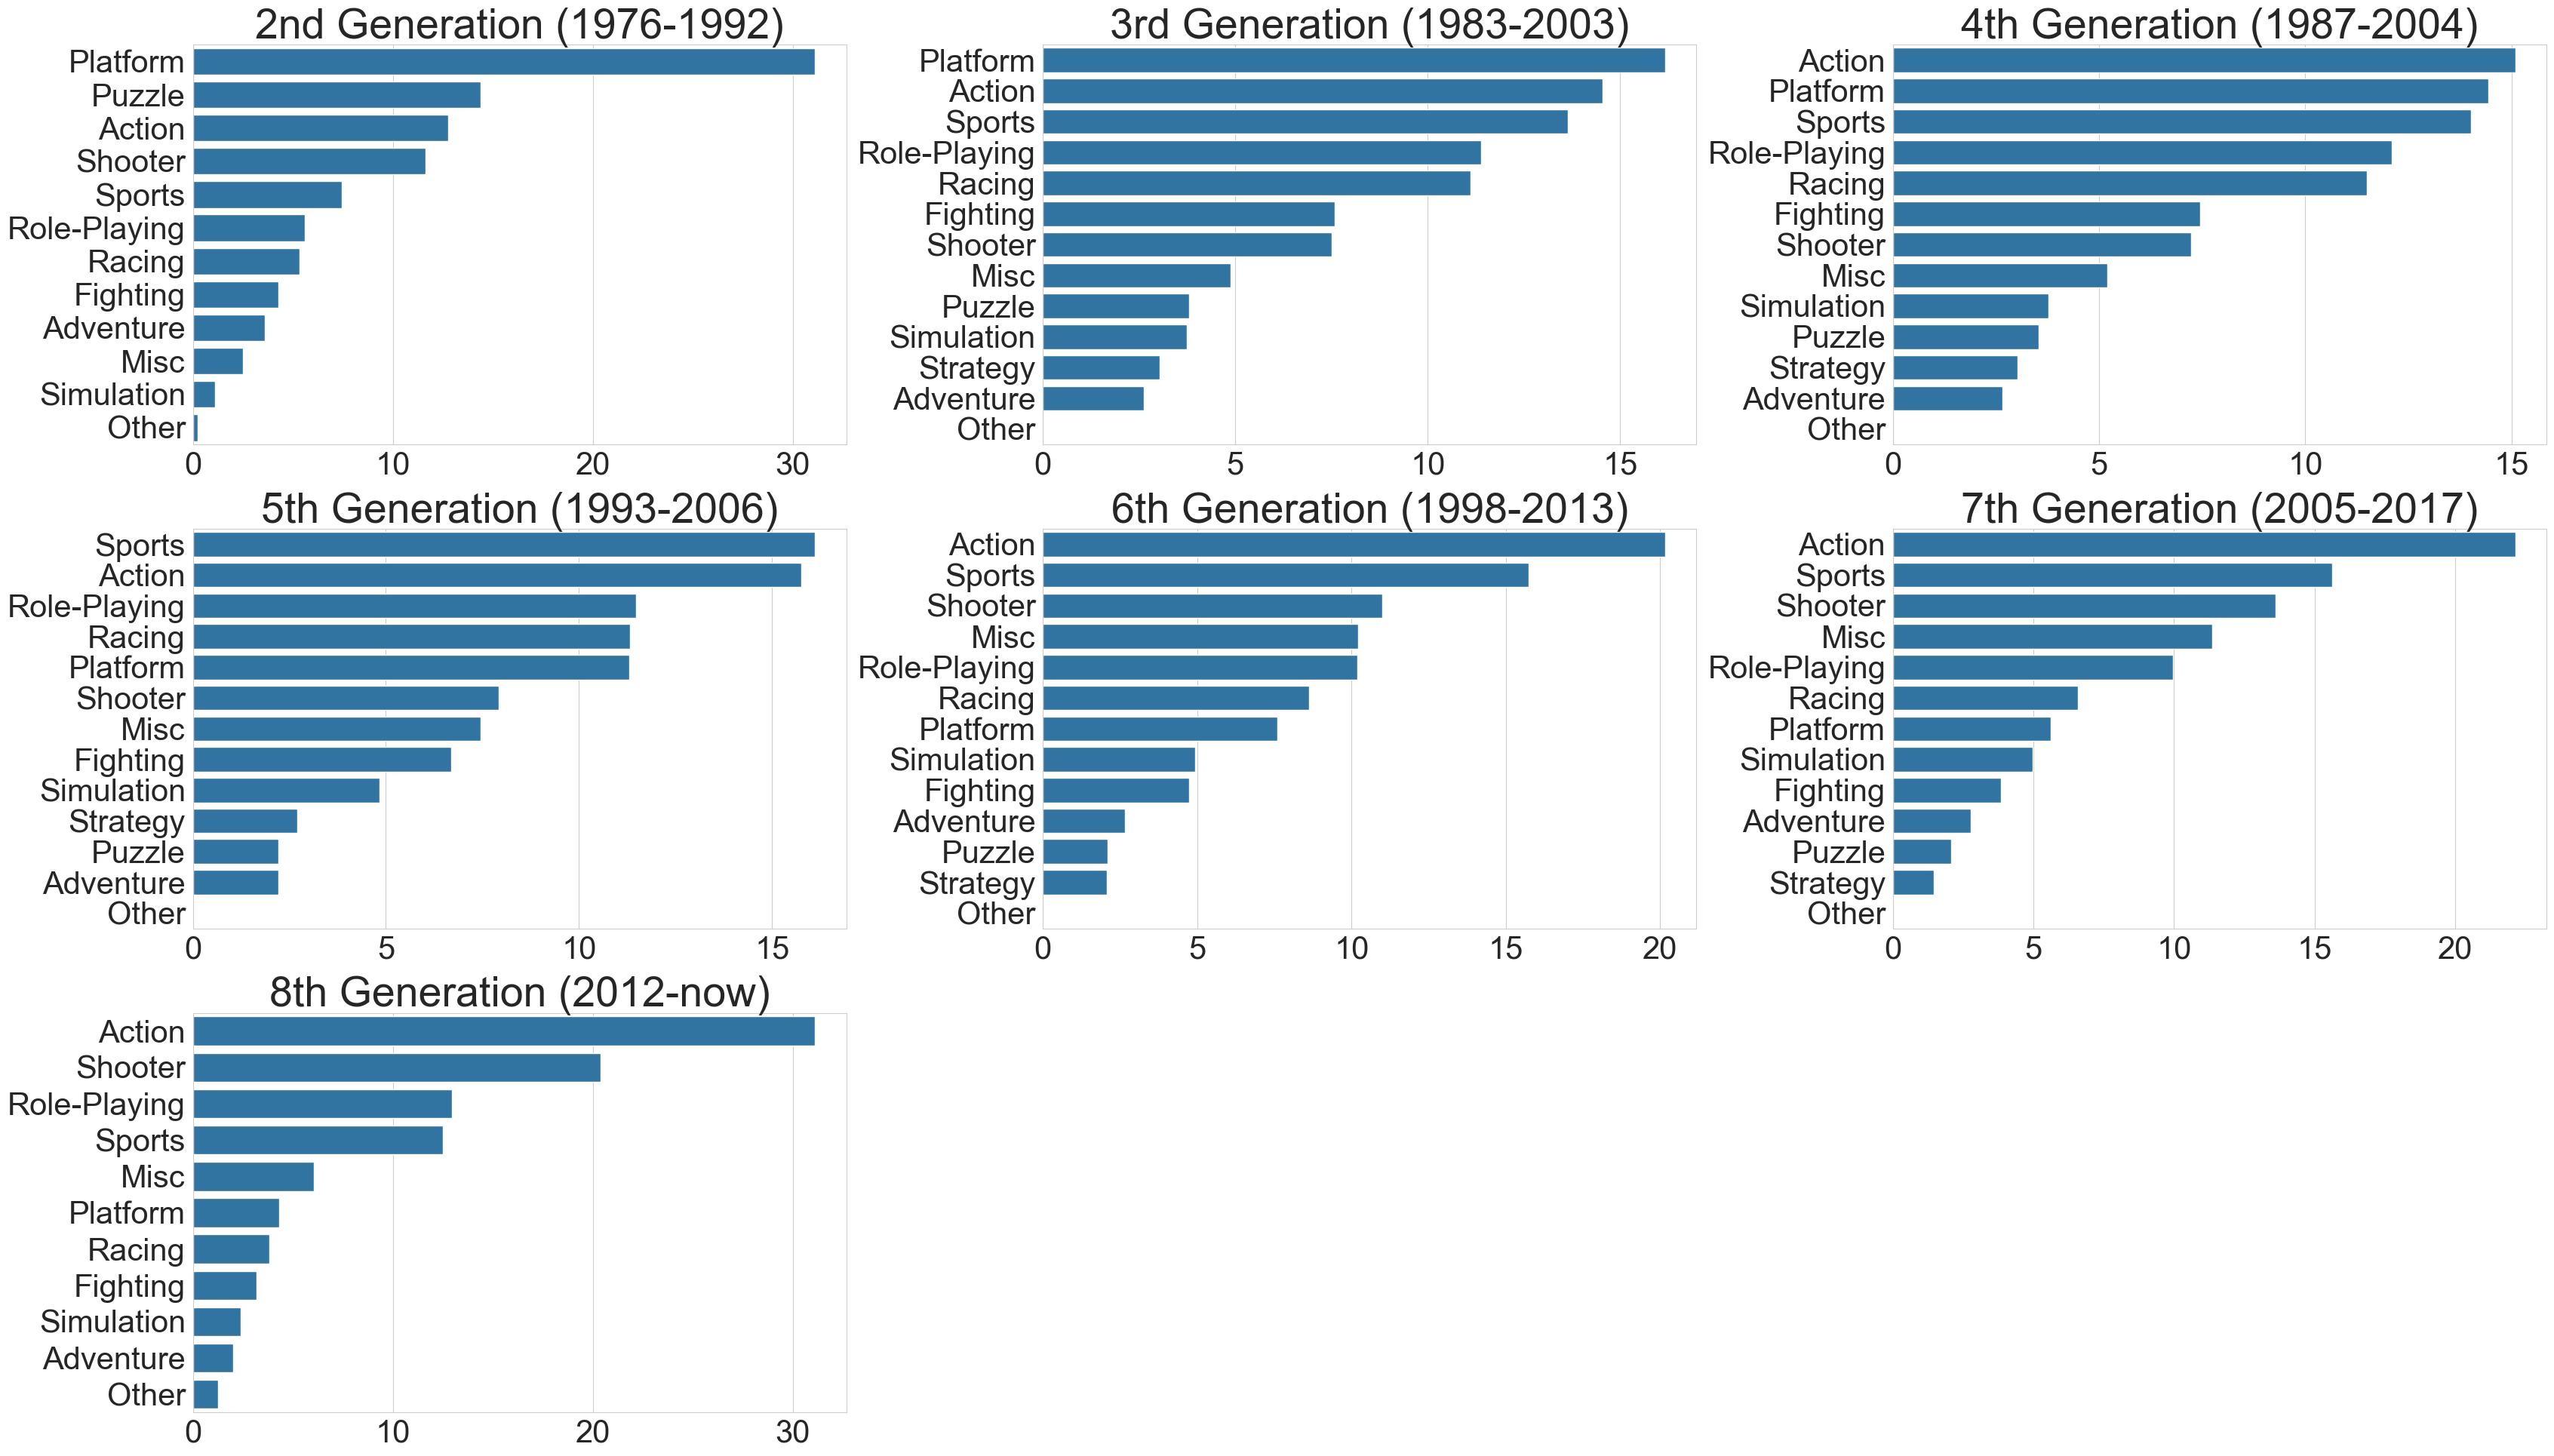

In [14]:
# 類型遊戲市佔率分析
def Genre_analysis(df, title='', ax=None):
    
    # 計算每個類型遊戲銷售總額
    platform_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
    
    # 計算整體遊戲類型銷售總額
    total_global_sales = df['Global_Sales'].sum()

    # 計算市場佔有率
    market_share = (platform_sales / total_global_sales) * 100

    # 將市場佔有率排序
    sorted_market_share = market_share.sort_values(ascending=False)

    # 確定 1% 閾值
    threshold = 1.0

    # 將最小的 5% 總和成一個 "其他" 部分
    small_share = sorted_market_share[sorted_market_share < threshold]
    other_share = pd.Series([small_share.sum()], index=['Other'])
    new_market_share = pd.concat([sorted_market_share[sorted_market_share >= threshold], other_share])

    # 繪製水平條圖
    sns.barplot(x=new_market_share.values, y=new_market_share.index, ax=ax)
    ax.set_title(title, fontsize=40)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=30)
    ax.tick_params(axis='x', labelsize=30)
    
# 創建子圖
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 20))

# 調用函數
Genre_analysis(df_2nd, title='2nd Generation (1976-1992)', ax=axes[0, 0])
Genre_analysis(df_3rd, title='3rd Generation (1983-2003)', ax=axes[0, 1])
Genre_analysis(df_4th, title='4th Generation (1987-2004)', ax=axes[0, 2])
Genre_analysis(df_5th, title='5th Generation (1993-2006)', ax=axes[1, 0])
Genre_analysis(df_6th, title='6th Generation (1998-2013)', ax=axes[1, 1])
Genre_analysis(df_7th, title='7th Generation (2005-2017)', ax=axes[1, 2])
Genre_analysis(df_8th, title='8th Generation (2012-now)', ax=axes[2, 0])

# 隱藏不用的子圖
for ax in axes.flat:
    if not ax.lines:
        ax.set_visible(False)

# 調整子圖距離
plt.tight_layout(rect=[0, 0, 0.97, 0.97])

- 從市場市佔率來看動作遊戲無疑是最受歡迎的遊戲類型，而隨著主機世代的演變大眾的喜愛偏好也有些許改變，在5-7世代時運動類遊戲穩居第二名，到了第8世代時大眾更偏向射擊與角色扮演類遊戲，而體育遊戲已經下降到位居第四。

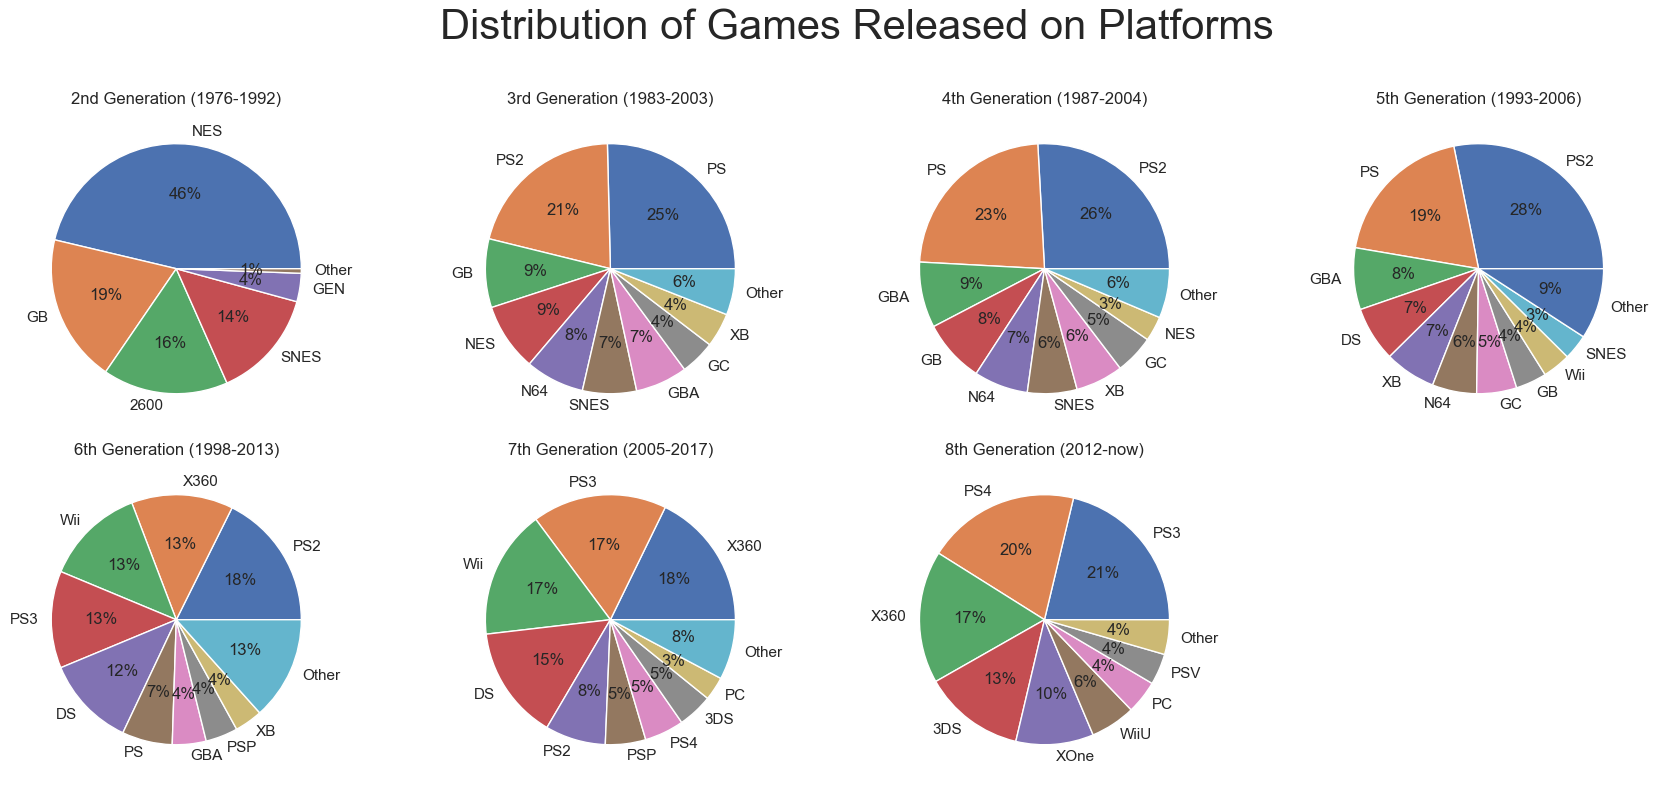

In [15]:

def platform_market_share_analysis(df, title='', ax=None):
    
    # 計算每個平台的銷售額
    platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

    # 計算整體市場銷售額
    total_global_sales = df['Global_Sales'].sum()

    # 計算市場份額
    market_share = (platform_sales / total_global_sales) * 100

    # 將市場佔有率排序
    sorted_market_share = market_share.sort_values(ascending=False)

    # 確定 3% 閾值
    threshold = 3.0

    # 將最小的 5% 總和成一個 "其他" 部分
    small_share = sorted_market_share[sorted_market_share < threshold]
    other_share = pd.Series([small_share.sum()], index=['Other'])
    new_market_share = pd.concat([sorted_market_share[sorted_market_share >= threshold], other_share])
    
    # 繪製圓餅圖
    new_market_share.plot.pie(autopct='%1.f%%', ax=ax)
    ax.set_title(title)
    ax.set_ylabel('')


# 使用 Seaborn 樣式
sns.set(style="whitegrid")

# 創建一個 2x4 的子圖配置，和設置 sharex 和 sharey 為 True
fig, axes = plt.subplots(2, 4, figsize=(18, 8), sharex=True, sharey=True)
fig.suptitle('Distribution of Games Released on Platforms', fontsize=30)

# 使用 np.unravel_index 將一維索引轉換為二維索引
platform_market_share_analysis(df_2nd, title='2nd Generation (1976-1992)', ax=axes[0, 0])
platform_market_share_analysis(df_3rd, title='3rd Generation (1983-2003)', ax=axes[0, 1])
platform_market_share_analysis(df_4th, title='4th Generation (1987-2004)', ax=axes[0, 2])
platform_market_share_analysis(df_5th, title='5th Generation (1993-2006)', ax=axes[0, 3])
platform_market_share_analysis(df_6th, title='6th Generation (1998-2013)', ax=axes[1, 0])
platform_market_share_analysis(df_7th, title='7th Generation (2005-2017)', ax=axes[1, 1])
platform_market_share_analysis(df_8th, title='8th Generation (2012-now)' , ax=axes[1, 2])

# 調整子圖間距
plt.tight_layout(rect=[0, 0, 0.97, 0.97])

# 隱藏不用的子圖
axes[-1, -1].set_visible(False)

- 從世代主機來看第七代的主機市占率在2012-2017時已經逐漸降低，這表示第七代主機已經逐漸遭到市場淘汰，而PS主機在2012-now已有著龍頭企業的趨勢。


## 建議:
    1.再上架平台上的選擇可以往第八代主機的方向靠攏，理由是第七代主機在2012-2017這個時間段市占率已經降低，而第八代主機則有著上升的趨勢，這表示第八代主機已經逐漸走入大眾視野，第七代主機將慢慢遭到市場的淘汰，此時如果再選擇第七代主機將不是個明智的選擇。
    2.遊戲開發可以選擇市占率在第八世代主機排名前幾的遊戲類型，這些遊戲類型有大量的受眾，被看見的機會自然更大。
     

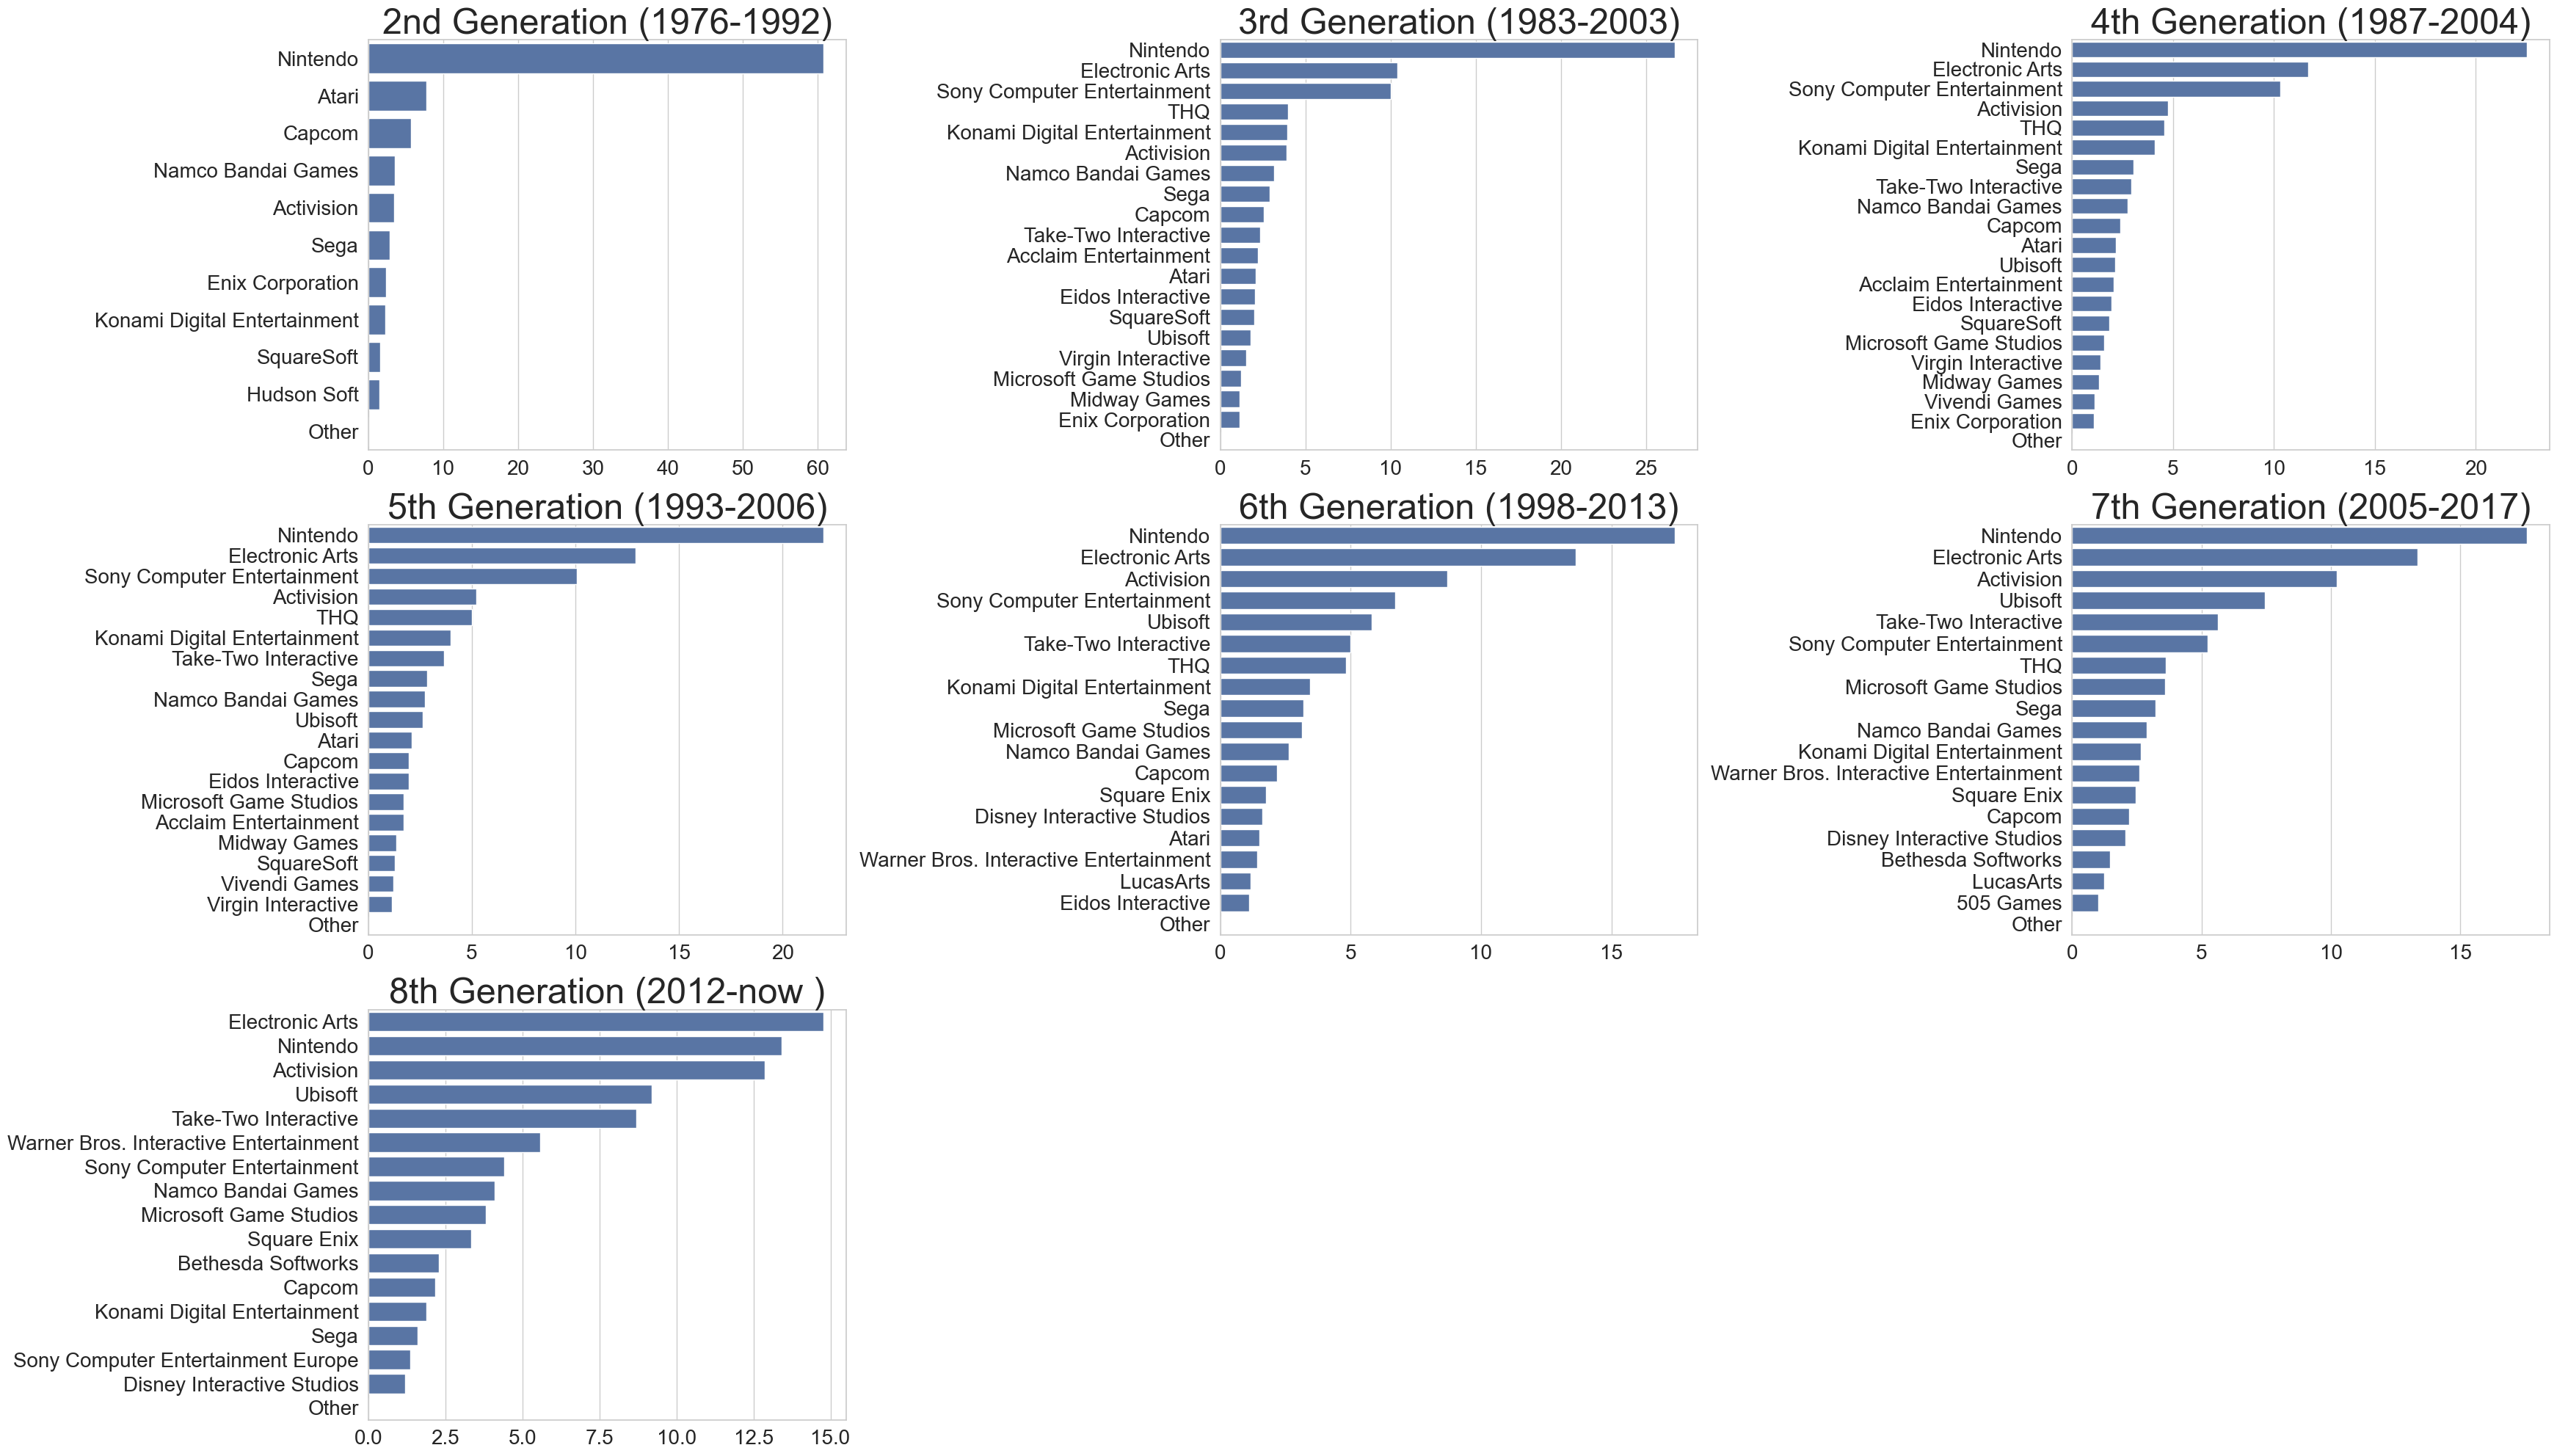

In [16]:
# 發行商市占率分析
def Publisher_analysis(df, title='', ax=None):
    
    # 計算每個平台銷售總額
    platform_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
    
    # 計算該世代平台銷售總額
    total_global_sales = df['Global_Sales'].sum()

    # 計算市場佔有率
    market_share = (platform_sales / total_global_sales) * 100

    # 將市場佔有率排序
    sorted_market_share = market_share.sort_values(ascending=False).loc[lambda x:x>1 ]

    # 確定 1% 閾值
    threshold = 1.0

    # 將最小的 5% 總和成一個 "其他" 部分
    small_share = sorted_market_share[sorted_market_share < threshold]
    other_share = pd.Series([small_share.sum()], index=['Other'])
    new_market_share = pd.concat([sorted_market_share[sorted_market_share >= threshold], other_share])

    # 繪製水平條圖
    sns.barplot(x=new_market_share.values, y=new_market_share.index, ax=ax)
    ax.set_title(title, fontsize=35)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)
    
# 創建子圖
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 20))

# 調用函數
Publisher_analysis(df_2nd , title='2nd Generation (1976-1992)' , ax=axes[0, 0])
Publisher_analysis(df_3rd , title='3rd Generation (1983-2003)' , ax=axes[0, 1])
Publisher_analysis(df_4th , title='4th Generation (1987-2004)' , ax=axes[0, 2])
Publisher_analysis(df_5th , title='5th Generation (1993-2006)' , ax=axes[1, 0])
Publisher_analysis(df_6th , title='6th Generation (1998-2013)' , ax=axes[1, 1])
Publisher_analysis(df_7th , title='7th Generation (2005-2017)' , ax=axes[1, 2])
Publisher_analysis(df_8th , title='8th Generation (2012-now )' , ax=axes[2, 0])
 
# 隱藏不用的子圖
for ax in axes.flat:
    if not ax.lines:
        ax.set_visible(False)

# 調整子圖距離
plt.tight_layout()

# 各地區用戶輪廓

In [17]:
# 篩選各地區遊戲總額排名
def region_Global_Sales(df , sales_column , head):
     
    df_games = df.groupby(by='Name').agg({
        'NA_Sales': 'sum',
        'EU_Sales': 'sum',
        'JP_Sales': 'sum',
        'Other_Sales': 'sum',
        'Global_Sales': 'sum'
    }).reset_index()

    region_top = df_games.sort_values(sales_column, ascending=False).head(10)
   
    return region_top
    
# 計算各地區平台市占率
def Platform_sales_by_region(df , sales_column , head=None):
    platform_sales = df.groupby('Platform')[sales_column].sum()
    total_platform_sales = df[sales_column].sum()
    market_share_by_Platform = ((platform_sales / total_platform_sales) * 100).sort_values(ascending=False).loc[lambda x:x>0.5 ]

    if head is not None:
        market_share_by_Platform = market_share_by_Platform.head(head)

    return market_share_by_Platform

# 計算各地區遊戲類型市占率
def Genre_sales_by_region(df, sales_column , head=None):
    platform_sales = df.groupby('Genre')[sales_column].sum()
    total_platform_sales = df[sales_column].sum()
    market_share_by_Genre = ((platform_sales / total_platform_sales) * 100).sort_values(ascending=False).loc[lambda x:x>0.5 ]

    if head is not None:
        market_share_by_Genre = market_share_by_Platform.head(head)

    return market_share_by_Genre

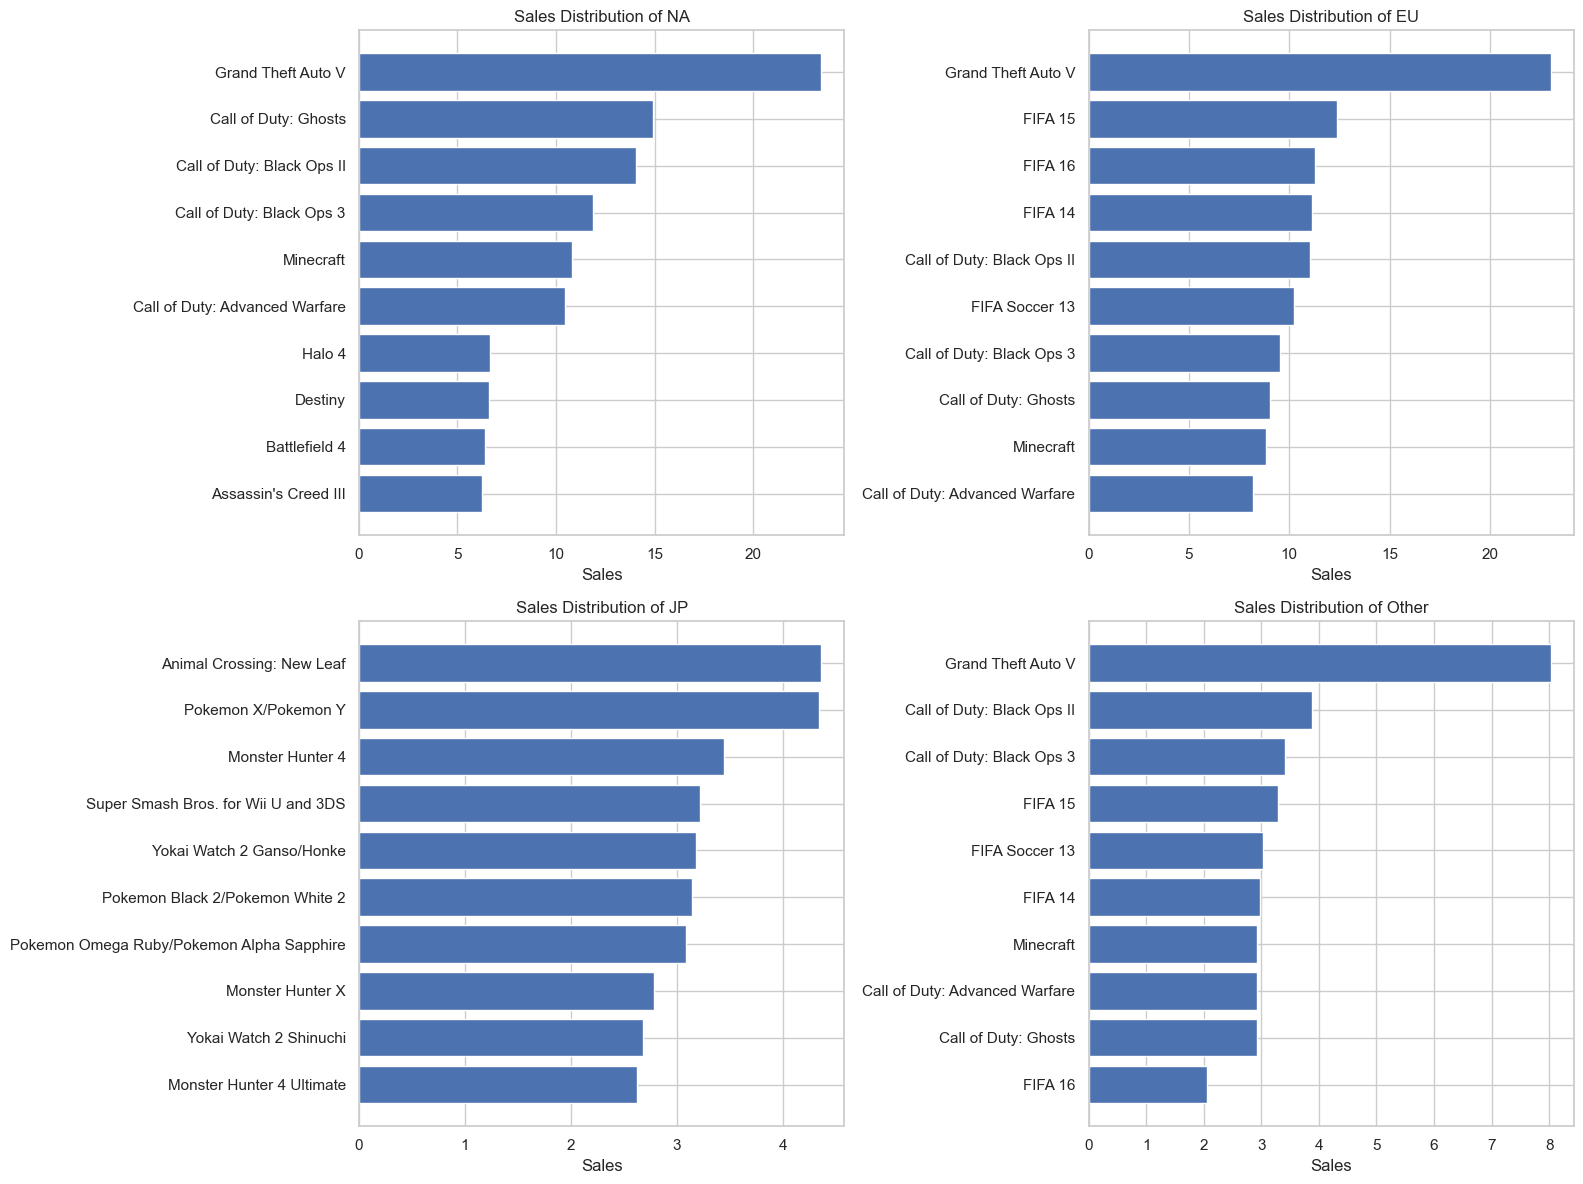

In [18]:
# 繪製各地區遊戲銷售分佈圖
def region_sales_top(df, sales_columns, head):
    sales_by_region = {}

    for column in sales_columns:
        sales_by_region[column] = (region_Global_Sales(df, column, head))
    # 圖表設置
    regions = ['NA', 'EU', 'JP', 'Other']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    # 繪製長條圖
    for ax, region in zip(axes.flatten(), regions):
        sales_data = sales_by_region[f'{region}_Sales']
        sales_data = sales_data[::-1]
        ax.barh(y=sales_data['Name'], width=sales_data[f'{region}_Sales'])
        ax.set_title(f'Sales Distribution of {region}')
        ax.set_xlabel('Sales')
        ax.set_ylabel('')

    # 調整子圖的間距
    plt.tight_layout()

# 調用函數
region_sales_top(df_8th, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 10)


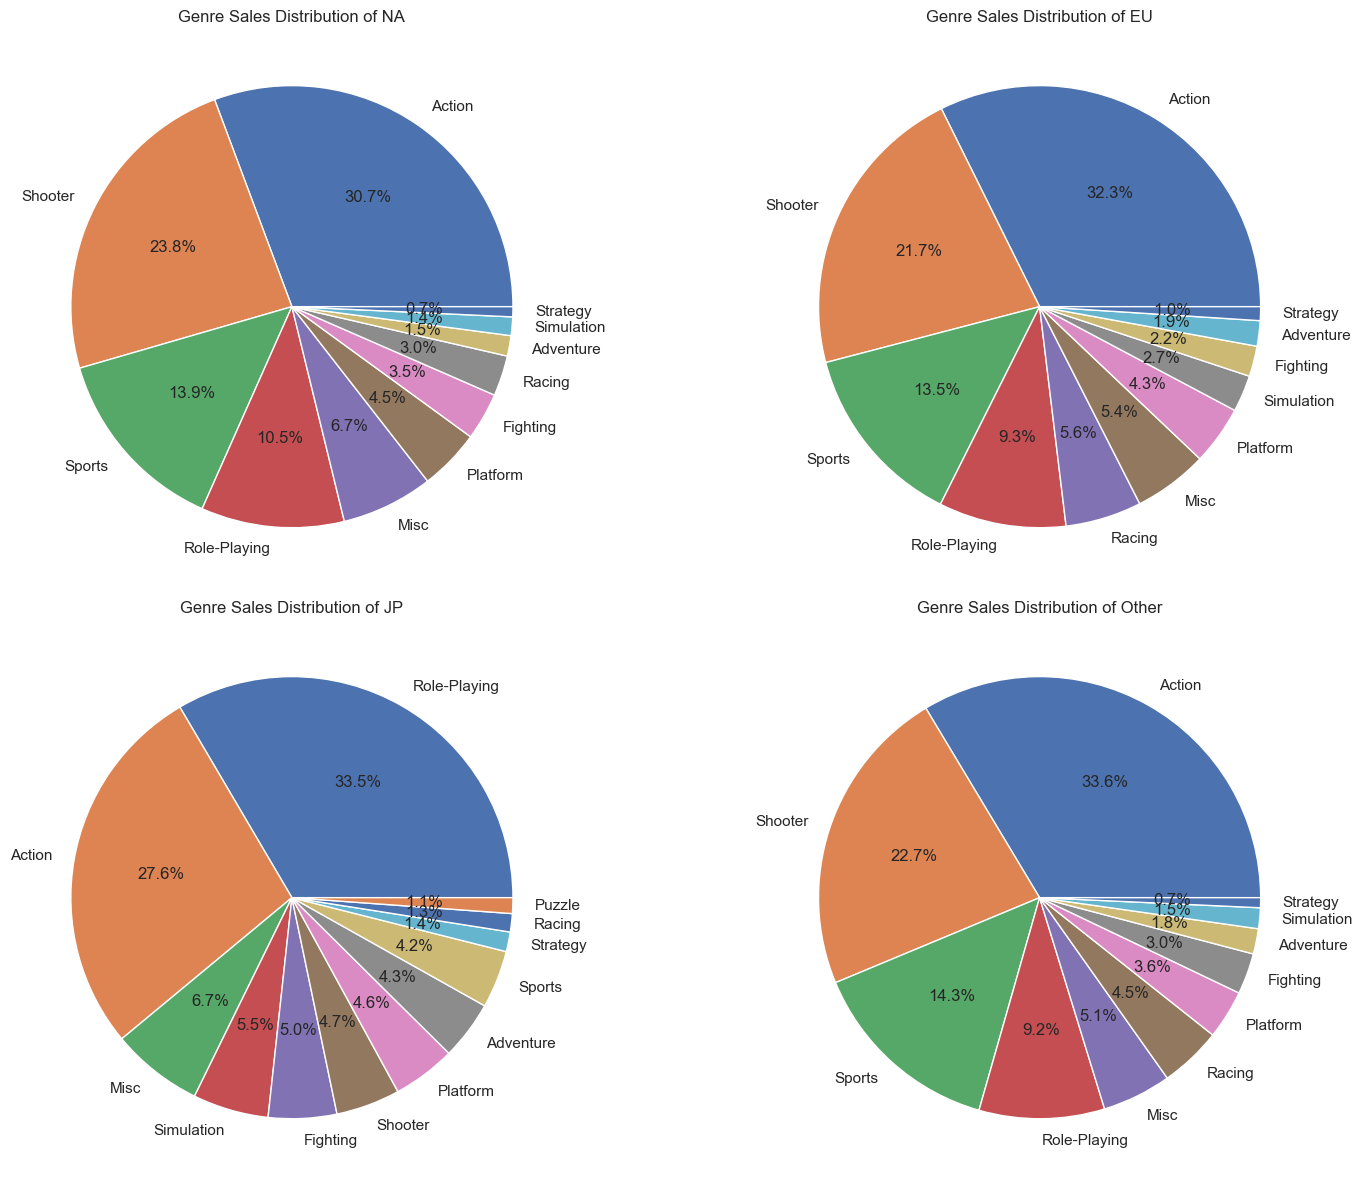

In [19]:
# 各地區偏好分析(依市佔率)
def region_Genre_analysis(df, sales_columns, title_prefix):
    sales_by_region = {}

    for column in sales_columns:
        sales_by_region[column] = Genre_sales_by_region(df, column)

    # 圖表設置
    regions = ['NA', 'EU', 'JP', 'Other']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    # 繪製圓餅圖
    for ax, region in zip(axes.flatten(), regions):
        sales_data = sales_by_region[f'{region}_Sales']
        ax.pie(sales_data, autopct='%1.1f%%', labels=sales_data.index)
        ax.set_title(f'{title_prefix} Sales Distribution of {region}')
        ax.set_ylabel('')

    # 調整子圖的間距
    plt.tight_layout()

# 調用函數
region_Genre_analysis(df_8th, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 'Genre')

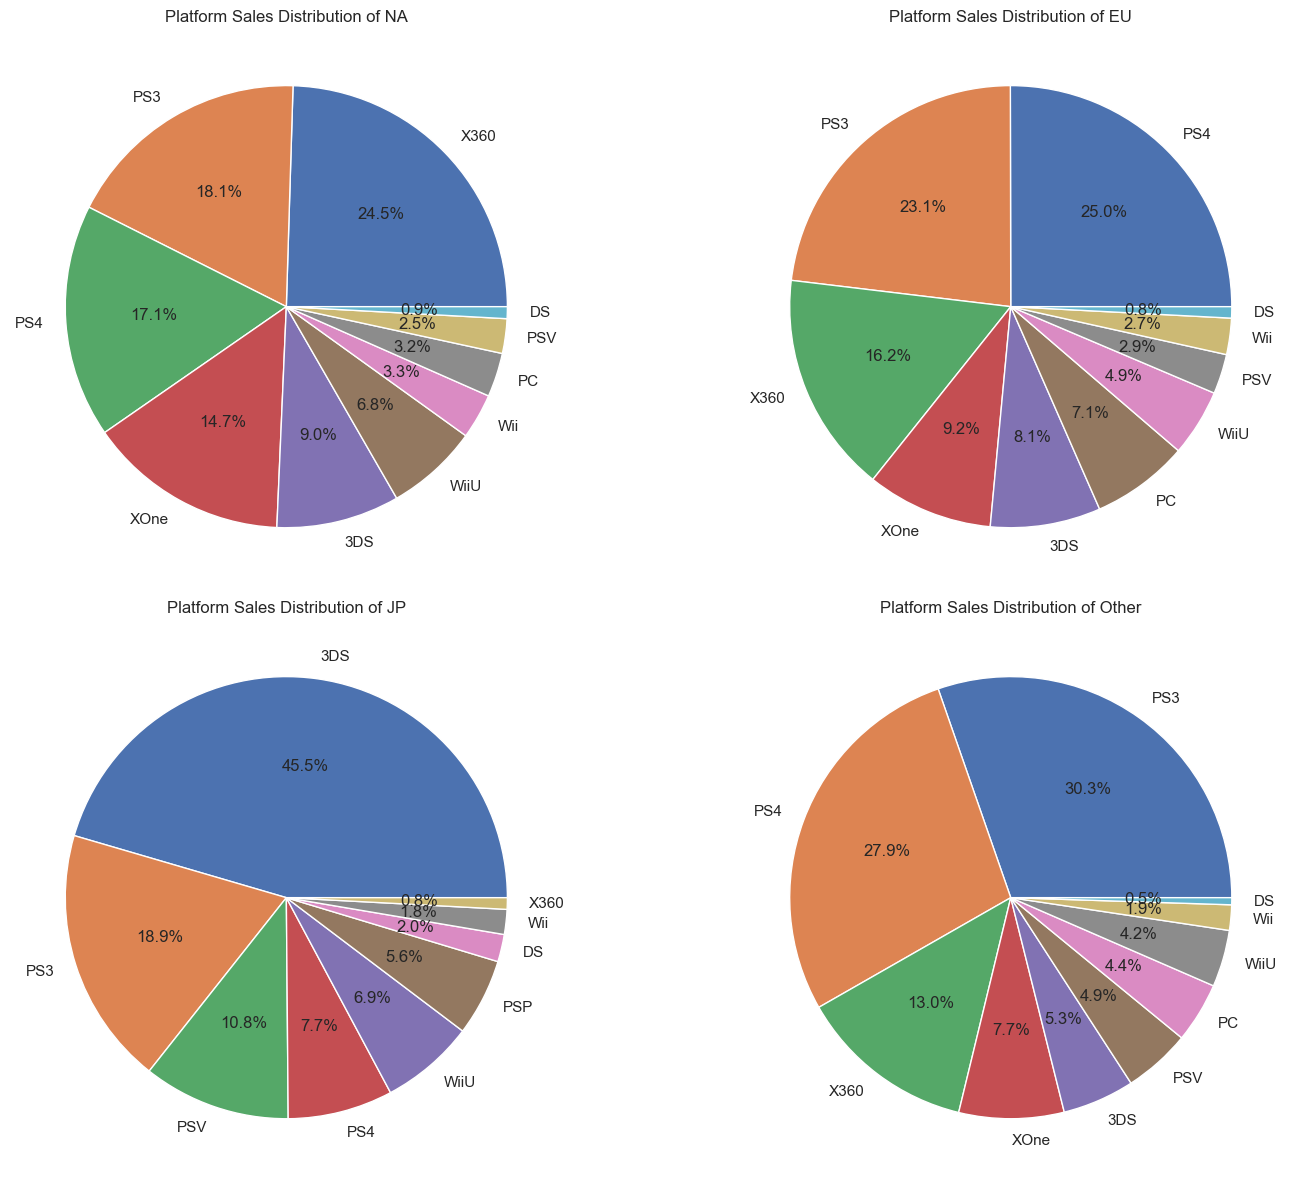

In [20]:
# 各地區平台市佔率
def region_Platform_analysis(df, sales_columns , title_prefix):
    sales_by_region = {}

    for column in sales_columns:
        sales_by_region[column] = Platform_sales_by_region(df, column)

    # 圖表設置
    regions = ['NA', 'EU', 'JP', 'Other']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    # 繪製圓餅圖
    for ax, region in zip(axes.flatten(), regions):
        sales_data = sales_by_region[f'{region}_Sales']
        ax.pie(sales_data, autopct='%1.1f%%', labels=sales_data.index)
        ax.set_title(f'{title_prefix} Sales Distribution of {region}')
        ax.set_ylabel('')

    # 調整子圖的間距
    plt.tight_layout()

# 調用函數
region_Platform_analysis(df_8th, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 'Platform')

### 第八世代主機用戶輪廓分析:
- 北美地區:
    - 遊戲類型偏好前三: 動作遊戲(30.7%)，射擊遊戲(23.8%)，運動競技遊戲(13.9%)
    - 偏好平台前三:X360(24.5%)，PS3(18.1%)，PS4(17.1%)
- 歐洲地區:
    - 遊戲類型偏好前三: 動作遊戲(32.3%)，射擊遊戲(21.7%)，運動競技遊戲(13.5%)
    - 偏好平台前三:PS4(25.0%)，PS3(23.1%)，X360(16.2%)


- 日本地區:
    - 遊戲類型偏好前三: 角色扮演遊戲(33.5%)，動作遊戲(27.6%)，音樂遊戲(6.7%)
    - 偏好平台前三:3DS(45.5%)，PS3(18.9%)，PSV(10.8%)

- 其他地區:
    - 遊戲類型偏好前三: 動作遊戲(33.6%)，射擊遊戲(22.7%)，運動競技遊戲(14.3%)
    - 偏好平台前三:PS3(30.7%)，PS4(27.9%)，X360(13.0%)



## 建議：
### 市場區隔和定位：

        1. 北美地區： 由於北美地區用戶對動作和射擊遊戲的高度偏好，建議在這個市場加強推廣這兩類型的遊戲。同時，重點關注 Xbox 360、PS3 和 PS4 平台，這是北美地區用戶較喜歡的主要遊戲平台。

        2.歐洲地區： 考慮將資源投放在動作和射擊遊戲上，特別是在 PS4 平台上。歐洲地區用戶對這兩類型遊戲的偏好較高。此外，也應該持續關注 PS3 和 Xbox 360 平台。

        3.日本地區： 由於日本地區用戶對角色扮演遊戲的高度偏好，建議在這個市場提供更多的角色扮演遊戲，尤其是針對 3DS 平台。此外，音樂遊戲在這個地區也有一定的市場份额，可以考慮推出更多相關遊戲。

        4.其他地區： 在其他地區，動作和射擊遊戲仍然是主要受歡迎的選擇。重點關注 PS3、PS4 和 Xbox 360 這些平台，並通過相應的市場活動和宣傳提高產品知名度。
